In [0]:
!pip install tensorflow==2.0.0-beta1

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils

from PIL import Image
import os
import PIL.Image as pilimg
import numpy as np
import pandas as pd
from keras.preprocessing import image as images

import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/gdrive')

test_x = np.load('/content/gdrive/My Drive/test.npy')
test_y = np.load('/content/gdrive/My Drive/test_label.npy')
test_x = test_x.astype('float32') / 255
test_x=np.reshape(test_x,(-1,test_x.shape[1],test_x.shape[2],3))
test_y = utils.to_categorical(test_y,10)
model = tf.keras.models.load_model('/content/gdrive/My Drive/JenDangPo.h5')
loss, acc = model.evaluate(test_x, test_y)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

class_names=['watch','power bank']
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
def model_JDP(path, answer):
    if answer == 'watch':
      answer=0
    else:
      answer=1
    answer=np.array([answer])
    img = path
    image = Image.open(img)
    resize_image = image.convert('RGB').resize((100,100), Image.ANTIALIAS)
    resize_image.save(img)
    resize_image = images.load_img(img, target_size=(100, 100))
    img_tensor = images.img_to_array(resize_image)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    predictions = model.predict(img_tensor)
    i = 0
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, answer, img_tensor)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, answer)
    plt.show()

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
1210/1210 [==============================] - 4s 3ms/sample - loss: 0.1858 - acc: 0.9603
복원된 모델의 정확도: 96.03%


In [4]:
test_x.shape

(1210, 100, 100, 3)

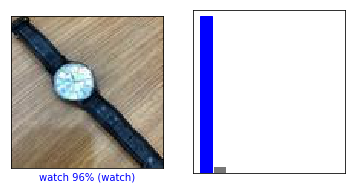

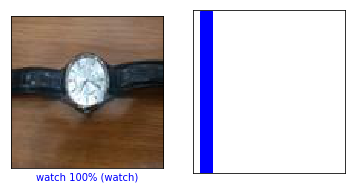

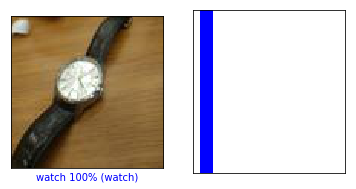

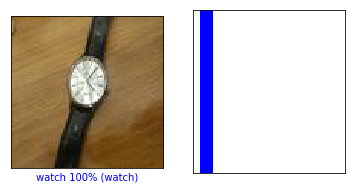

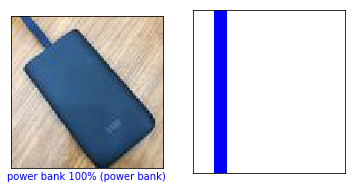

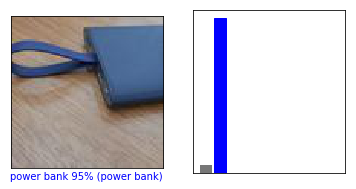

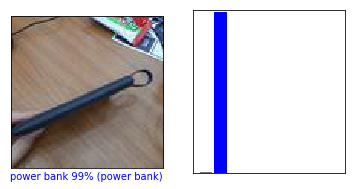

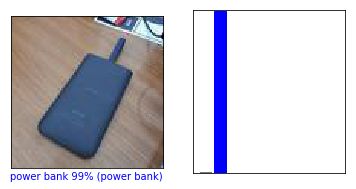

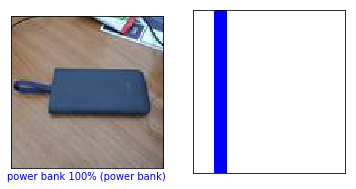

In [2]:
model_JDP('/content/gdrive/My Drive/test_wat.jpg', 'watch')
model_JDP('/content/gdrive/My Drive/test_wat_01.jpg', 'watch')
model_JDP('/content/gdrive/My Drive/test_wat_03.jpg', 'watch')
model_JDP('/content/gdrive/My Drive/test_wat_04.jpg', 'watch')
model_JDP('/content/gdrive/My Drive/test_pb.jpg', 'power bank')
model_JDP('/content/gdrive/My Drive/test_pb_01.jpg', 'power bank')
model_JDP('/content/gdrive/My Drive/test_pb_03.jpg', 'power bank')
model_JDP('/content/gdrive/My Drive/test_pb_04.jpg', 'power bank')
model_JDP('/content/gdrive/My Drive/test_pb_05.jpg', 'power bank')